In [1]:
import numpy as np
import mpmath 
import matplotlib.pyplot as plt
import math as mth
from scipy import linalg, signal, constants, optimize, signal

In [2]:
with open('rho_2dots_dt5e-5_fix_nint.dat') as file:
    rho_00_dot1Elliot = []
    for index,line in enumerate(file):
        values = line.split(' ')
        rho_00_dot1Elliot.append(np.float(values[0]))
rho_00_dot1Elliot = np.array(rho_00_dot1Elliot)

In [3]:
with open('rho_2dots_dt5e-5_fix_nint.dat') as file:
    rho_00_dot2Elliot = []
    for index,line in enumerate(file):
        values = line.split(' ')
        rho_00_dot2Elliot.append(np.float(values[4]))
rho_00_dot2Elliot = np.array(rho_00_dot2Elliot)

In [4]:
with open('rho_2dots_dt5e-5_fix_nint.dat') as file:
    rho_01_real_dot1Elliot = []
    for index,line in enumerate(file):
        values = line.split(' ')
        rho_01_real_dot1Elliot.append(np.float(values[1]))
rho_01_real_dot1Elliot = np.array(rho_01_real_dot1Elliot)

In [5]:
with open('rho_2dots_dt5e-5_fix_nint.dat') as file:
    rho_01_real_dot2Elliot = []
    for index,line in enumerate(file):
        values = line.split(' ')
        rho_01_real_dot2Elliot.append(np.float(values[5]))
rho_01_real_dot2Elliot = np.array(rho_01_real_dot2Elliot)

In [6]:
with open('rho_2dots_dt5e-5_fix_nint.dat') as file:
    rho_01_imag_dot1Elliot = []
    for index,line in enumerate(file):
        values = line.split(' ')
        rho_01_imag_dot1Elliot.append(np.float(values[2]))
rho_01_imag_dot1Elliot = np.array(rho_01_imag_dot1Elliot)

In [7]:
with open('rho_2dots_dt5e-5_fix_nint.dat') as file:
    rho_01_imag_dot2Elliot = []
    for index,line in enumerate(file):
        values = line.split(' ')
        rho_01_imag_dot2Elliot.append(np.float(values[6]))
rho_01_imag_dot2Elliot = np.array(rho_01_imag_dot2Elliot)

In [8]:
with open('chi_fix_2dot.dat') as file:
    chi_dot1_elliot = []
    for index,line in enumerate(file):
        values = line.split(' ')
        chi_dot1_elliot.append(np.float(values[0]))
chi_dot1_elliot = np.array(chi_dot1_elliot)

In [9]:
with open('chi_fix_2dot.dat') as file:
    chi_dot2_elliot = []
    for index,line in enumerate(file):
        values = line.split(' ')
        chi_dot2_elliot.append(np.float(values[0]))
chi_dot2_elliot = np.array(chi_dot2_elliot)

In [10]:
B = 5

In [11]:
m = np.arange(-B,B+1)
n = np.arange(-B,B+1)
mn_sum_abs = np.add.outer(abs(m),abs(n))

m,n = np.meshgrid(m,n)

mn = mn_sum_abs<=B
m = m[mn]
n = n[mn]

m_positive = m>=0

m = m[m_positive]
n = n[m_positive]

In [12]:
omega_0 = 2278.9013
period = 2*np.pi/omega_0
f0 = omega_0 / (2*np.pi)

stop_time = 10 #in picoseconds

#Dot parameters
sigma = 2278.9013
t0 = 0.0
hbar = 0.65821193
T1 = 1e6
T2 = 2e6

omega_r = 5.2917721e-4*1558.8929/hbar
f_r = omega_r/(2*np.pi)
# omega_k = np.sort(m*omega_0 + n*omega_r)

# #Remove negative frequencies for real signals
# omega_k = omega_k[omega_k>=0]

omega_k = np.array([omega_r,omega_0-omega_r,omega_0+omega_r,2*omega_0-omega_r,2*omega_0+omega_r])

num_frequencies = omega_k.size
num_coefficients = 2*num_frequencies - 1

In [13]:
rho_00_dot1_elliot = rho_00_dot1Elliot
rho_00_dot2_elliot = rho_00_dot2Elliot

rho_01_dot1_elliot = rho_01_real_dot1Elliot + 1j*rho_01_imag_dot1Elliot
rho_01_dot2_elliot = rho_01_real_dot2Elliot + 1j*rho_01_imag_dot2Elliot

t_elliot = np.linspace(0,10,rho_01_dot1_elliot.size)
dt = stop_time/t_elliot.size

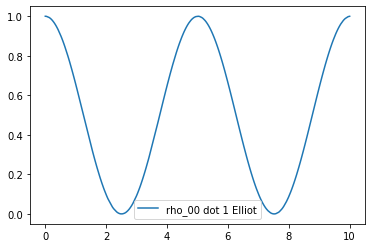

In [14]:
plt.figure()
plt.plot(t_elliot,rho_00_dot1_elliot,label='rho_00 dot 1 Elliot')
plt.legend()
plt.show()

In [15]:
def get_uvw(rho_00,rho_01):
    u = 2*rho_01.real
    v = 2*rho_01.imag
    w = 1-2*rho_00
    return u,v,w

In [16]:
def plot_frequency_spectra(signal_t,t,minimum_f=-t_elliot.size/2,maximum_f=t_elliot.size/2):
    #plots the freq spec for a given signal.  minimum_f and maximum_f must be in Hz. signal is the variable name
    stop_time = t[-1]
    dt = stop_time/t.size
    Signal_w = np.fft.fftshift(np.fft.fft(signal_t))
    freq = np.fft.fftshift(np.fft.fftfreq(signal_t.size,dt))
    
    min_nfreq = np.argmin(abs(minimum_f - freq))
    max_nfreq = np.argmin(abs(maximum_f - freq))
    
    plt.figure()
    plt.semilogy(freq[min_nfreq:max_nfreq],abs(Signal_w)[min_nfreq:max_nfreq])
    plt.grid()
    plt.xlabel('Linear Frequency')
    plt.ylabel('|Magnitude|')
    plt.show()
    
    plt.figure()
    plt.plot(freq[min_nfreq:max_nfreq],np.angle(Signal_w,deg=True)[min_nfreq:max_nfreq])
    plt.ylabel('Phase (degrees)')
    plt.xlabel('Linear Frequency')
    plt.show()

In [17]:
u1_elliot,v1_elliot,w1_elliot = get_uvw(rho_00_dot1_elliot,rho_01_dot1_elliot)
u2_elliot,v2_elliot,w2_elliot = get_uvw(rho_00_dot2_elliot,rho_01_dot2_elliot)

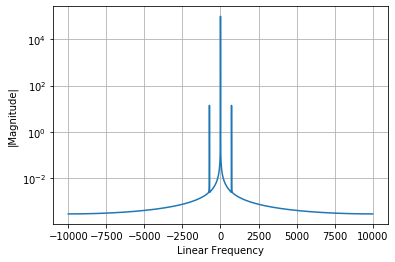

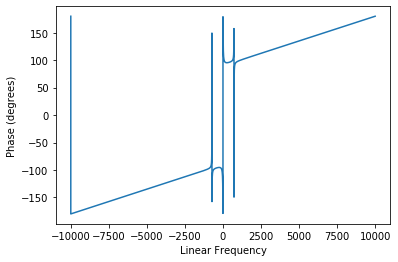

In [18]:
plot_frequency_spectra(w2_elliot,t_elliot)

In [19]:
def get_gamma(t):
    return np.hstack((np.cos(omega_k*t[:,np.newaxis]),np.sin(omega_k[1:]*t[:,np.newaxis])))

In [20]:
def get_gamma_t0(t):
    return np.hstack((np.cos(omega_k*t),np.sin(omega_k[1:]*t)))

In [21]:
def get_gamma_prime(t):
    return np.hstack((-omega_k*np.sin(omega_k*t[:,np.newaxis]),omega_k[1:]*np.cos(omega_k[1:]*t[:,np.newaxis])))

In [22]:
def get_chi(t):
    x_hat = np.array([1,0,0])
    wave_vector = x_hat
    r = x_hat*0.0
    args = np.dot(wave_vector,r) - omega_0*(t-t0)

    d = 5.2917721e-4*x_hat
    E0 = 1558.8929
    
    #pulse = np.exp(omega_0*(t - t0)**2/(2*sigma**2))
    #pulse = 0
    pulse = 1
    
    El = np.array([E0*np.cos(args)*pulse,0,0])
    chi = np.dot(d,El) / hbar
    return chi

In [23]:
def get_rhos(u,v,w):
    rho_00 = 0.5 - 0.5*w
    rho_01 = 0.5*u + 0.5j*v
    return rho_00, rho_01

In [24]:
def plot_harmonic_error(f1,f2,f3):
    plt.figure()
    plt.semilogy(abs(f1),label='f1')
    plt.semilogy(abs(f2),label='f2')
    plt.semilogy(abs(f3),label='f3')
    plt.legend()
    plt.show()

In [25]:
t_k = np.linspace(0,stop_time,(num_coefficients - 1))

In [26]:
def get_f(coefficients,t=t_k):
    chi1 = get_chi(t)
    chi2 = get_chi(t)
    
    num_coefficients = 2*num_frequencies - 1
    
    u1_coeff = coefficients[:num_coefficients]
    v1_coeff = coefficients[num_coefficients:2*num_coefficients]
    w1_coeff = coefficients[2*num_coefficients:3*num_coefficients]
    
    u2_coeff = coefficients[3*num_coefficients:4*num_coefficients]
    v2_coeff = coefficients[4*num_coefficients:5*num_coefficients]
    w2_coeff = coefficients[5*num_coefficients:]
    
    gamma = get_gamma(t_k)
    gamma_prime = get_gamma_prime(t_k)
    gamma_0 = get_gamma_t0(0)
    
    u1 = gamma@u1_coeff
    v1 = gamma@v1_coeff
    w1 = gamma@w1_coeff
    
    u2 = gamma@u2_coeff
    v2 = gamma@v2_coeff
    w2 = gamma@w2_coeff
    
    u1_dot = gamma_prime@u1_coeff
    v1_dot = gamma_prime@v1_coeff
    w1_dot = gamma_prime@w1_coeff
    
    u2_dot = gamma_prime@u2_coeff
    v2_dot = gamma_prime@v2_coeff
    w2_dot = gamma_prime@w2_coeff
    
    f1_dot1 = -omega_0*v1 - u1_dot
    f2_dot1 = omega_0*u1 - 2*chi1*w1 - v1_dot
    f3_dot1 = 2*chi1*v1 - w1_dot
    f4_dot1 = gamma_0@u1_coeff
    f5_dot1 = gamma_0@v1_coeff
    f6_dot1 = gamma_0@w1_coeff + 1
    
    f1_dot2 = -omega_0*v2 - u2_dot
    f2_dot2 = omega_0*u2 - 2*chi2*w2 - v2_dot
    f3_dot2 = 2*chi2*v2 - w2_dot
    f4_dot2 = gamma_0@u2_coeff
    f5_dot2 = gamma_0@v2_coeff
    f6_dot2 = gamma_0@w2_coeff + 1
    
    #plot_harmonic_error(f1,f2,f3,f4,f5,f6)
    
    fk_dot1 = np.hstack((f1_dot1,f2_dot1,f3_dot1,f4_dot1,f5_dot1,f6_dot1))
    fk_dot2 = np.hstack((f1_dot2,f2_dot2,f3_dot2,f4_dot2,f5_dot2,f6_dot2))
    
    return np.hstack((fk_dot1,fk_dot2))

In [27]:
gamma = get_gamma(t_elliot)
W = gamma.T@gamma
W_inv = linalg.inv(W)

u1coeff_guess = W_inv@gamma.T@u1_elliot
v1coeff_guess = W_inv@gamma.T@v1_elliot
w1coeff_guess = W_inv@gamma.T@w1_elliot

u2coeff_guess = W_inv@gamma.T@u2_elliot
v2coeff_guess = W_inv@gamma.T@v2_elliot
w2coeff_guess = W_inv@gamma.T@w2_elliot

coefficients_guess = np.hstack((u1coeff_guess,v1coeff_guess,w1coeff_guess,u2coeff_guess,v2coeff_guess,w2coeff_guess))

u1_guess = gamma@u1coeff_guess
v1_guess = gamma@v1coeff_guess
w1_guess = gamma@w1coeff_guess

u2_guess = gamma@u2coeff_guess
v2_guess = gamma@v2coeff_guess
w2_guess = gamma@w2coeff_guess

In [28]:
coeff = optimize.fsolve(get_f, coefficients_guess)

In [29]:
u1_coeff = coeff[:num_coefficients]
v1_coeff = coeff[num_coefficients:2*num_coefficients]
w1_coeff = coeff[2*num_coefficients:3*num_coefficients]

u2_coeff = coeff[3*num_coefficients:4*num_coefficients]
v2_coeff = coeff[4*num_coefficients:5*num_coefficients]
w2_coeff = coeff[5*num_coefficients:]

In [30]:
u1 = gamma@u1_coeff
v1 = gamma@v1_coeff
w1 = gamma@w1_coeff

u2 = gamma@u2_coeff
v2 = gamma@v2_coeff
w2 = gamma@w2_coeff

/home/moormanc212/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


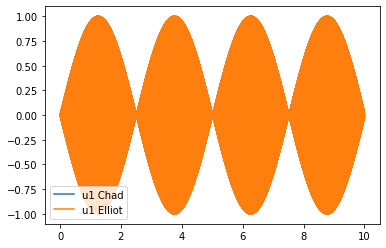

In [31]:
plt.figure()
plt.plot(t_elliot,u1,label='u1 Chad')
plt.plot(t_elliot,u1_elliot,label='u1 Elliot')
plt.legend()
plt.show()

/home/moormanc212/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


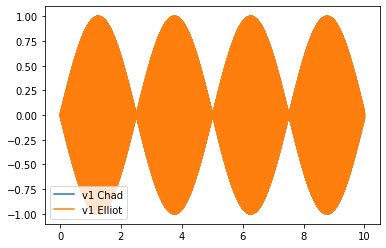

In [32]:
plt.figure()
plt.plot(t_elliot,v1,label='v1 Chad')
plt.plot(t_elliot,v1_elliot,label='v1 Elliot')
plt.legend()
plt.show()

/home/moormanc212/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


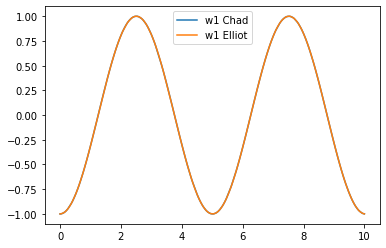

In [33]:
plt.figure()
plt.plot(t_elliot,w1,label='w1 Chad')
plt.plot(t_elliot,w1_elliot,label='w1 Elliot')
plt.legend()
plt.show()

/home/moormanc212/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


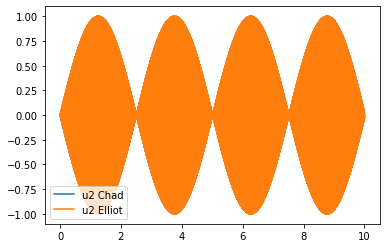

In [34]:
plt.figure()
plt.plot(t_elliot,u2,label='u2 Chad')
plt.plot(t_elliot,u2_elliot,label='u2 Elliot')
plt.legend()
plt.show()

/home/moormanc212/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


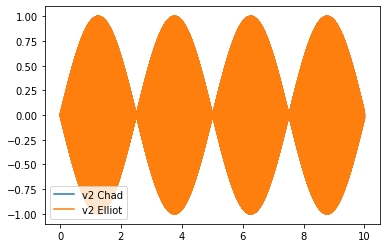

In [35]:
plt.figure()
plt.plot(t_elliot,v2,label='v2 Chad')
plt.plot(t_elliot,v2_elliot,label='v2 Elliot')
plt.legend()
plt.show()

/home/moormanc212/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


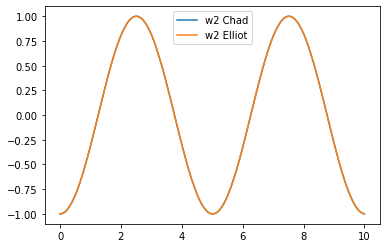

In [36]:
plt.figure()
plt.plot(t_elliot,w2,label='w2 Chad')
plt.plot(t_elliot,w2_elliot,label='w2 Elliot')
plt.legend()
plt.show()

In [37]:
w1_L2_error = linalg.norm(w1 - w1_elliot)/linalg.norm(w1_elliot)
v1_L2_error = linalg.norm(v1 - v1_elliot)/linalg.norm(v1_elliot)
u1_L2_error = linalg.norm(u1 - u1_elliot)/linalg.norm(u1_elliot)

w2_L2_error = linalg.norm(w2 - w2_elliot)/linalg.norm(w2_elliot)
v2_L2_error = linalg.norm(v2 - v2_elliot)/linalg.norm(v2_elliot)
u2_L2_error = linalg.norm(u2 - u2_elliot)/linalg.norm(u2_elliot)

In [38]:
print('u1 L2 error',u1_L2_error)
print('v1 L2 error',v1_L2_error)
print('w1 L2 error',w1_L2_error)

print('u2 L2 error',u2_L2_error)
print('v2 L2 error',v2_L2_error)
print('w2 L2 error',w2_L2_error)

u1 L2 error 1.5898106150406024
v1 L2 error 1.5898108603059897
w1 L2 error 0.0004016703308524714
u2 L2 error 1.5898106150634461
v2 L2 error 1.5898108603288146
w2 L2 error 0.000401670330775576


In [39]:
U1 = np.fft.fftshift(np.fft.fft(u1))
V1 = np.fft.fftshift(np.fft.fft(v1))
W1 = np.fft.fftshift(np.fft.fft(w1))

U2 = np.fft.fftshift(np.fft.fft(u2))
V2 = np.fft.fftshift(np.fft.fft(v2))
W2 = np.fft.fftshift(np.fft.fft(w2))

U1_elliot = np.fft.fftshift(np.fft.fft(u1_elliot))
V1_elliot = np.fft.fftshift(np.fft.fft(v1_elliot))
W1_elliot = np.fft.fftshift(np.fft.fft(w1_elliot))

U2_elliot = np.fft.fftshift(np.fft.fft(u2_elliot))
V2_elliot = np.fft.fftshift(np.fft.fft(v2_elliot))
W2_elliot = np.fft.fftshift(np.fft.fft(w2_elliot))

frequency = np.fft.fftshift(np.fft.fftfreq(U1.size,d=dt))

/home/moormanc212/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


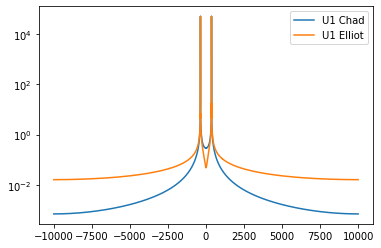

In [40]:
plt.figure()
plt.semilogy(frequency,abs(U1),label='U1 Chad')
plt.semilogy(frequency,abs(U1_elliot),label='U1 Elliot')
plt.legend()
plt.show()

/home/moormanc212/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


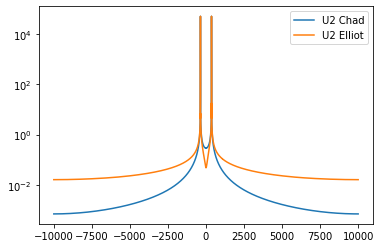

In [41]:
plt.figure()
plt.semilogy(frequency,abs(U2),label='U2 Chad')
plt.semilogy(frequency,abs(U2_elliot),label='U2 Elliot')
plt.legend()
plt.show()

/home/moormanc212/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


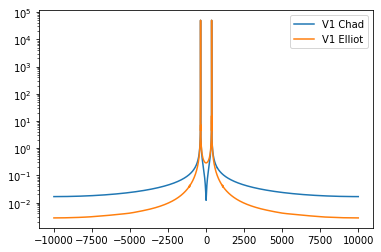

In [42]:
plt.figure()
plt.semilogy(frequency,abs(V1),label='V1 Chad')
plt.semilogy(frequency,abs(V1_elliot),label='V1 Elliot')
plt.legend()
plt.show()

/home/moormanc212/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


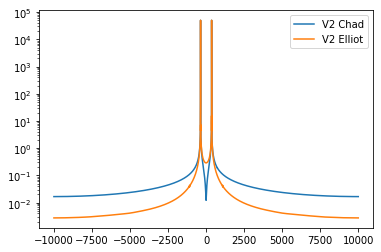

In [43]:
plt.figure()
plt.semilogy(frequency,abs(V2),label='V2 Chad')
plt.semilogy(frequency,abs(V2_elliot),label='V2 Elliot')
plt.legend()
plt.show()

/home/moormanc212/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


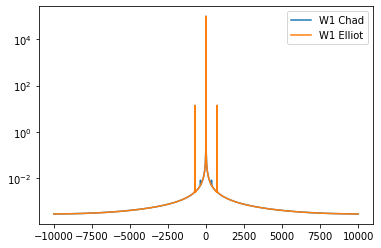

In [44]:
plt.figure()
plt.semilogy(frequency,abs(W1),label='W1 Chad')
plt.semilogy(frequency,abs(W1_elliot),label='W1 Elliot')
plt.legend()
plt.show()

/home/moormanc212/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


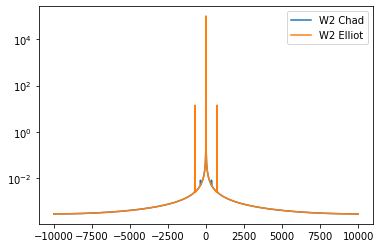

In [45]:
plt.figure()
plt.semilogy(frequency,abs(W2),label='W2 Chad')
plt.semilogy(frequency,abs(W2_elliot),label='W2 Elliot')
plt.legend()
plt.show()